In [1]:
# Load libraries
from skimage.graph import route_through_array, shortest_path
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# Get array index to the value that is closest to a given value
def get_closest(array, value):
    return np.abs(array - value).argmin()

# Load CMEMS and GFS data 

In [3]:
# Set file path
path = 'data/CMEMS/'
file = os.path.join(path,'mfwamglocep_2021050200_R20210502.nc')

In [4]:
# Load netCDF file into xarray
dataset = xr.open_dataset(file)
dataset

<xarray.Dataset>
Dimensions:    (latitude: 2041, longitude: 4320, time: 8)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2021-05-02T03:00:00 ... 2021-05-03
Data variables: (12/17)
    VHM0       (time, latitude, longitude) float32 ...
    VMDR_WW    (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VMDR_SW2   (time, latitude, longitude) float32 ...
    ...         ...
    VTPK       (time, latitude, longitude) float32 ...
    VSDX       (time, latitude, longitude) float32 ...
    VSDY       (time, latitude, longitude) float32 ...
    VPED       (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
Attributes: (12/27)
    Conventions:                   CF-1.6
    time_coverage_start:           20210502-03:00:00
    time_coverage_end:             20210503-00:00:00
    date_created:                  20210502-06:36:00
    product_type:                  forecast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                            ...
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

In [5]:
# Set file path
path = 'data/GFS/'
file = os.path.join(path,'GFS_2021-05-07.nc')
data_gfs = xr.open_dataset(file)
data_gfs

<xarray.Dataset>
Dimensions:                           (lat: 721, lon: 1440, time1: 1)
Coordinates:
    reftime1                          (time1) datetime64[ns] ...
  * time1                             (time1) datetime64[ns] 2021-05-07T09:00:00
  * lat                               (lat) float32 90.0 89.75 ... -89.75 -90.0
  * lon                               (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
Data variables:
    Wind_speed_gust_surface           (time1, lat, lon) float32 ...
    LatLon_Projection                 int32 ...
    Geopotential_height_maximum_wind  (time1, lat, lon) float32 ...
    Temperature_surface               (time1, lat, lon) float32 ...
    Temperature_maximum_wind          (time1, lat, lon) float32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

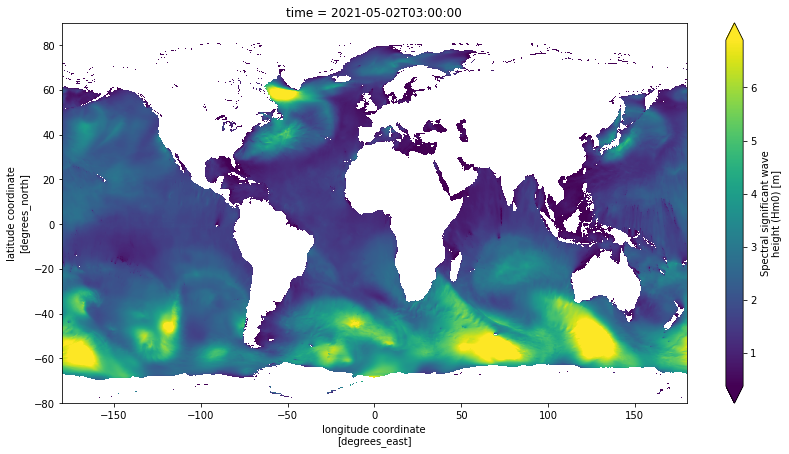

In [6]:
# Plot one variable in the dataset for a specific time slice
dataset.VHM0.isel(time=0).plot(robust=True, aspect=2, size=7);

In [7]:
# CMEMS Dictionaries

param_dict = {
    'VHM0': {'variable': 'Spectral significant wave height (Hm0)', 'unit': 'm'},
    'VMDR_WW': {'variable': 'Mean wind wave direction from', 'unit': 'degree'},
    'VHM0_WW': {'variable': 'Spectral significant wind wave height', 'unit': 'm'},
    'VMDR_SW1': {'variable': 'Mean primary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW1':{'variable': 'Spectral moments (0,1) primary swell wave period', 'unit': 's'},
    'VMDR_SW2': {'variable': 'Mean secondary swell wave direction from', 'unit': 'degree'},
    'VTM01_SW2': {'variable': 'Spectral moments (0,1) secondary swell wave period', 'unit': 's'},
    'VMDR': {'variable': 'Mean wave direction from (Mdir)', 'unit': 'degree'},
    'VTM10': {'variable': 'Spectral moments (-1,0) wave period (Tm-10)', 'unit': 's'},
    'VHM0_SW1': {'variable': 'Spectral significant primary swell wave height', 'unit': 'm'},
    'VHM0_SW2': {'variable': 'Spectral significant secondary swell wave height', 'unit': 'm'},
    'VTPK': {'variable': 'Wave period at spectral peak / peak period (Tp)', 'unit': 's'},
    'VSDX': {'variable': 'Stokes drift U', 'unit': 'm/s'},
    'VSDY': {'variable': 'Stokes drift V', 'unit': 'm/s'},
    'VPED': {'variable': 'Wave principal direction at spectral peak', 'unit': 'degree'},
    'VTM02': {'variable': 'Spectral moments (0,2) wave period (Tm02)', 'unit': 's'},
    'VTM01_WW': {'variable': 'Spectral moments (0,1) wind wave period', 'unit': 's'}
}


time_dict = {
    0: '00 UTC',
    1: '03 UTC',
    2: '06 UTC',
    3: '09 UTC',
    4: '12 UTC',
    5: '15 UTC',
    6: '18 UTC',
    7: '21 UTC',
}

# Define routing problem

Calculate the optimal shipping route between New York and Lisbon regarding different parameters. <br>

New York: 40.7128° N, 74.0060° W <br>
Lisbon: 38.7223° N, 9.1393° W

### Define area of interest

In [8]:
# Set bounding box for the allowed routing corridor
bbox = ((-80, 25),(-5, 47))
# Select time
time_slice = 0

In [9]:
# Get indices of the bbox
lon_min = get_closest(dataset.longitude.data, bbox[0][0])
lat_min = get_closest(dataset.latitude.data, bbox[0][1])
lon_max = get_closest(dataset.longitude.data, bbox[1][0])
lat_max = get_closest(dataset.latitude.data, bbox[1][1])

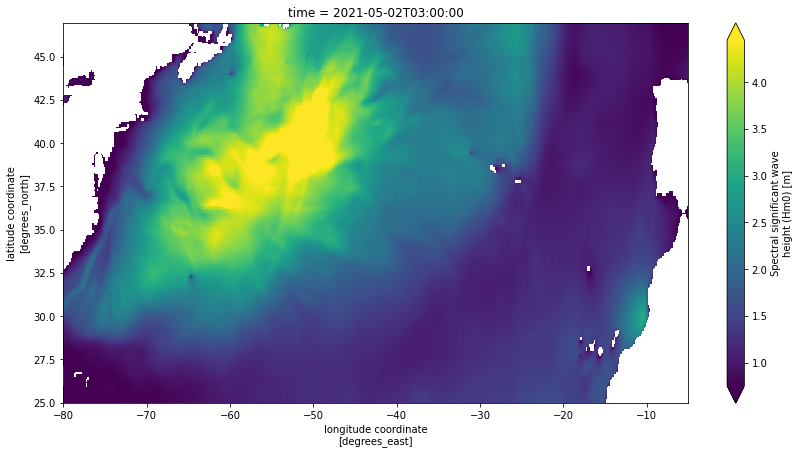

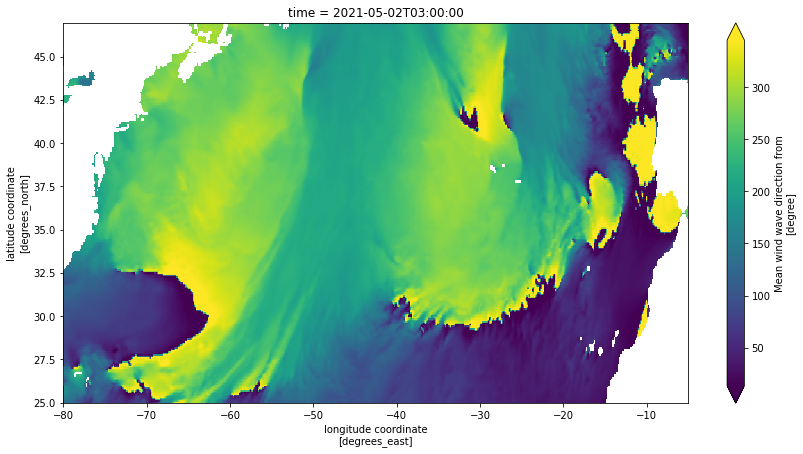

In [10]:
# Extract array from dataset to define the cost in the routing algorithm 
# -> subset space, time and variable
wave_height = dataset.VHM0.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
wave_height.plot(robust=True, aspect=2, size=7);

swell_height = dataset.VHM0_SW1.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
# swell_height.plot(robust=True, aspect=2, size=7);

wind_direction = dataset.VMDR_WW.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
wind_direction.plot(robust=True, aspect=2, size=7);


#### Resampling
Coarse CMEMS data to same resolution as GFS

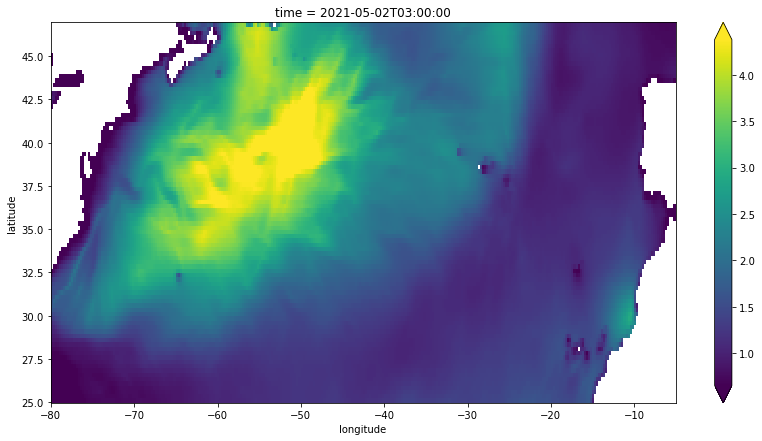

In [11]:
w_height_coarse = wave_height.coarsen(longitude=3).min().coarsen(latitude=3).min()
w_height_coarse.plot(robust=True, aspect=2, size=7);

w_direction_c = wind_direction.coarsen(longitude=3).min().coarsen(latitude=3).min()

In [12]:
# w_direction_c.plot()

### GFS area of interest

In [13]:
import cartopy.crs as ccrs

<xarray.DataArray 'Temperature_surface' (lat: 88, lon: 300)>
array([[273.10864, 271.90863, 272.70865, ..., 285.40863, 285.40863, 285.40863],
       [271.50864, 272.00864, 272.10864, ..., 285.70865, 285.50864, 285.50864],
       [271.70865, 271.90863, 271.90863, ..., 285.80865, 285.80865, 285.80865],
       ...,
       [302.30865, 302.00864, 301.70865, ..., 313.90863, 314.10864, 312.60864],
       [302.40863, 302.10864, 301.70865, ..., 313.50864, 312.10864, 313.20865],
       [302.40863, 302.00864, 301.70865, ..., 312.30865, 313.80865, 314.80865]],
      dtype=float32)
Coordinates:
    reftime1  datetime64[ns] 2021-05-07
    time1     datetime64[ns] 2021-05-07T09:00:00
  * lat       (lat) float32 47.0 46.75 46.5 46.25 46.0 ... 26.0 25.75 25.5 25.25
  * lon       (lon) float32 280.0 280.2 280.5 280.8 ... 354.0 354.2 354.5 354.8
Attributes:
    long_name:                      Temperature @ Ground or water surface
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-0-0_L1
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

<Figure size 1440x720 with 0 Axes>

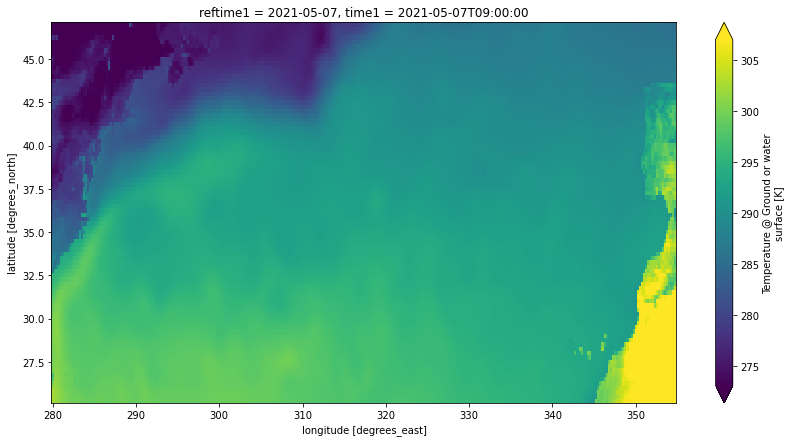

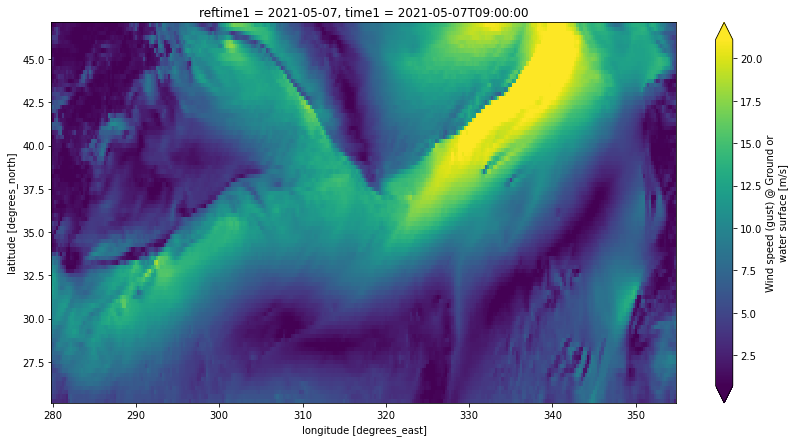

In [26]:
# Set bounding box for the allowed routing corridor

bbox = ((280, 47),(355, 25))
# Select time
time_slice = 0

# Get indices of the bbox
lon_min = get_closest(data_gfs.lon.data, bbox[0][0])
lat_min = get_closest(data_gfs.lat.data, bbox[0][1])
lon_max = get_closest(data_gfs.lon.data, bbox[1][0])
lat_max = get_closest(data_gfs.lat.data, bbox[1][1])

fig = plt.figure(figsize=(20, 10))
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
temp = data_gfs.Temperature_surface.isel(time1 = time_slice, lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
temp.plot(robust=True, aspect=2, size=7)
np.shape(temp.data)

wind_speed = data_gfs.Wind_speed_gust_surface.isel(time1 = time_slice, lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
wind_speed.plot(robust=True, aspect=2, size=7)

temp


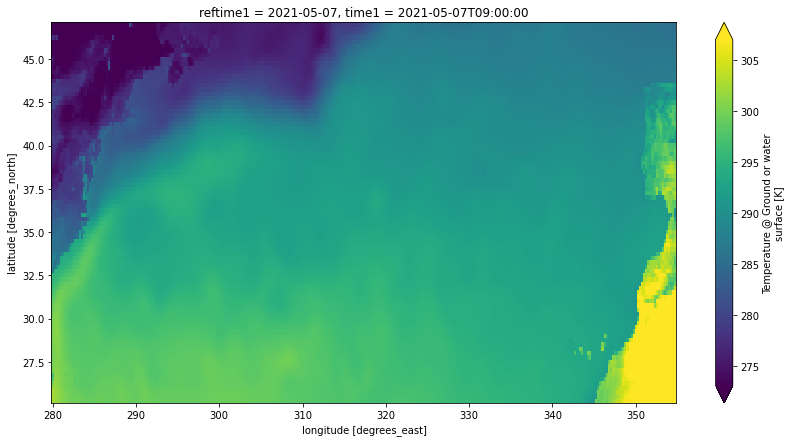

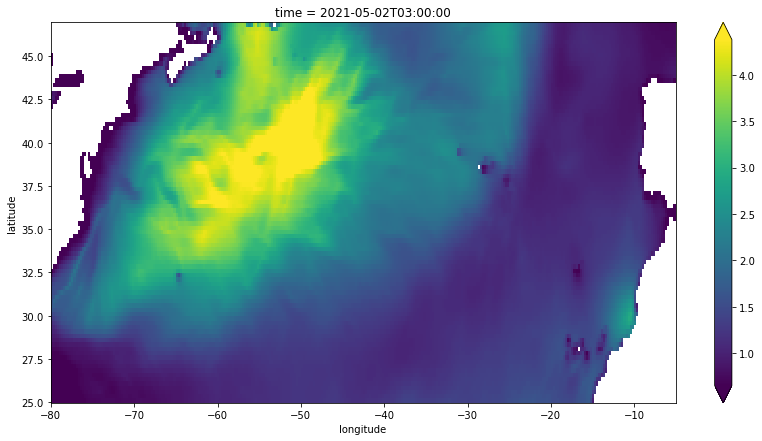

In [15]:
temp.plot(robust=True, aspect=2, size=7)
w_height_coarse.plot(robust=True, aspect=2, size=7)

### Modelling *costs*
Costs are modelled as some (for now) more or less random combination of parameters that may have an influence on the fuel consumption during the voyage.

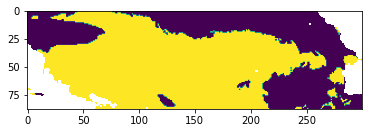

In [16]:
# assigning values to wind directions
# very simple for now: assuming 0 degree means north wind and the ship travels from East to West
def direction_cost(w_direction):
    cost = w_direction.copy()
    cost[w_direction < 180] = 0.8 
    cost[w_direction >= 180] = 1.2
    return cost

# type(w_direction_c.data)
# test = w_direction_c.data.copy()
plt.imshow(direction_cost(w_direction_c.data))
# w_direction_c.data

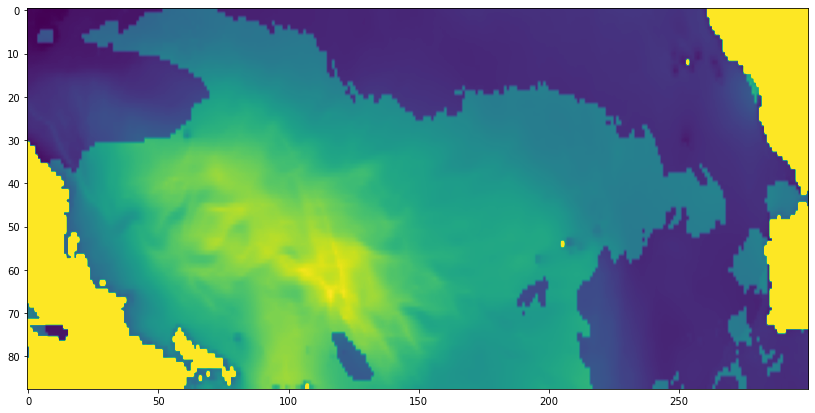

In [33]:
costs_0 = w_height_coarse.data + temp.data/250 - (direction_cost(w_direction_c.data) * (wind_speed.data/np.nanmax(wind_speed.data)))
costs = (w_height_coarse.data + temp.data/50) * direction_cost(w_direction_c.data)
# Temperature, ship parameter (e.g. weight), some direction, salinity, (draught)

# Set NaN values to large costs as the algorithm cannot handle NaNs
costs[np.isnan(costs)] = 2 * np.nanmax(costs) 
costs_0[np.isnan(costs_0)] = 2 * np.nanmax(costs_0) 
plt.figure(figsize=(14,7))
plt.imshow(costs, aspect='auto',vmin=np.min(costs), vmax=0.5*np.max(costs));

### Define start/end point of route 

In [18]:
lat_NY = 40.7128
lon_NY = -74.0060
lat_LS = 38.7223
lon_LS = -9.1393

In [19]:
# coordinates of coarse data
start_lon = get_closest(w_height_coarse.longitude.data, lon_NY)
start_lat = get_closest(w_height_coarse.latitude.data, lat_NY)
end_lon = get_closest(w_height_coarse.longitude.data,lon_LS)
end_lat = get_closest(w_height_coarse.latitude.data,lat_LS)
# coordinates of higher resolution CMEMS data
# start_lon = get_closest(wave_height.longitude.data, lon_NY)
# start_lat = get_closest(wave_height.latitude.data, lat_NY)
# end_lon = get_closest(wave_height.longitude.data,lon_LS)
# end_lat = get_closest(wave_height.latitude.data,lat_LS)

In [20]:
start = (start_lat, start_lon)
end = (end_lat, end_lon)
start

(63, 24)

# Calculate route (minimum cost path)

In [21]:
# Calculate optimal route based on the minimum cost path

# Optional parameters:
# - fully_connected 
#     - False -> only axial moves are allowed
#     - True  -> diagonal moves are allowed
# - geometric 
#     - False -> minimum cost path
#     - True  -> distance-weighted minimum cost path

indices, weight = route_through_array(costs, start, end, fully_connected=False, geometric=True)
indices = np.stack(indices, axis=-1)
indices

indices_min, weight = route_through_array(costs, start, end, fully_connected=True, geometric=False)
indices_min = np.stack(indices_min, axis=-1)
indices_min

short, cost = shortest_path(costs, reach = 5, output_indexlist = True)
short = np.stack(short, axis=-1)

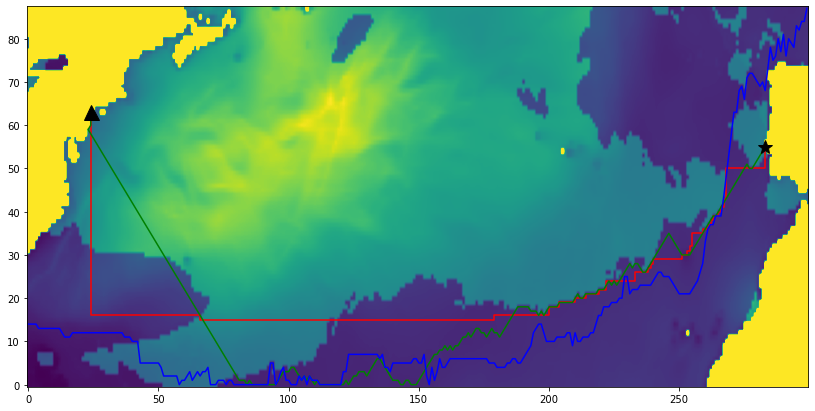

In [41]:
# Plot optimal route

plt.figure(figsize=(14,7))
# Costs
plt.imshow(costs, aspect='auto', vmin=np.min(costs), vmax=0.5*np.max(costs));
# Route
plt.plot(indices[1],indices[0], 'r')
plt.plot(indices_min[1],indices_min[0], 'g')
plt.plot(short[1],short[0], 'b')
# Start/end points
plt.plot(start_lon, start_lat, 'k^', markersize=15)
plt.plot(end_lon, end_lat, 'k*', markersize=15)
plt.gca().invert_yaxis();

### Second costs route

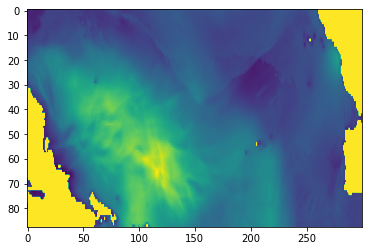

In [38]:
plt.imshow(costs_0, aspect='auto',vmin=np.min(costs_0), vmax=0.5*np.max(costs_0));

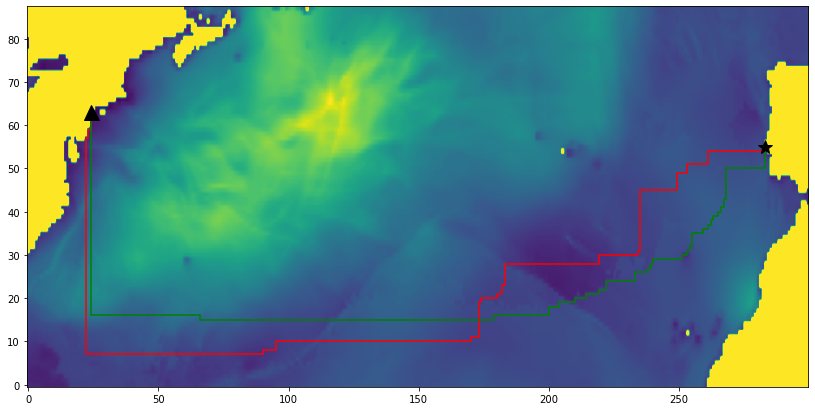

In [39]:
indices_0, weight = route_through_array(costs_0, start, end, fully_connected=False, geometric=True)
indices_0 = np.stack(indices_0, axis=-1)
indices_0

plt.figure(figsize=(14,7))
# Costs
plt.imshow(costs_0, aspect='auto', vmin=np.min(costs_0), vmax=0.5*np.max(costs_0));
# Route
plt.plot(indices_0[1],indices_0[0], 'r')
plt.plot(indices[1],indices[0], 'g')
# Start/end points
plt.plot(start_lon, start_lat, 'k^', markersize=15)
plt.plot(end_lon, end_lat, 'k*', markersize=15)
plt.gca().invert_yaxis();

### Consider ship direction
    Costs:
    - relative wave direction
    - relative wind direction
    - maneuvering ship (sharp turns not possible / need more energy)

In [24]:
# TODO as next step 

# TODO
- Consider current direction of ship
    - include dynamic data
    - forbid sharp turns / make it more expensive
- Try further data modelling approaches 
    - do research on models and what influences fuel consumption
    - Weight data
- Upsampling GFS instead of downsampling CMEMS data
- Normalize data
- Automatically load data from different sources at same datetime
- Use different (temporal) datasets for progress on route
- Not just look at neighbouring pixels -> accept some high costs at next pixel to save lot more at later stage

### -> Split up work